# Player Analysis

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [75]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [76]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [77]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','dl_applied','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs','penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 26)

## Taking in consideration only DC VS SRH matches

In [78]:
dicti = {"Delhi Daredevils":"Delhi Capitals"}
matches["team1"]=matches["team1"].replace(dicti)
matches["team2"]=matches["team2"].replace(dicti)
matches["toss_winner"]=matches["toss_winner"].replace(dicti)
matches["batting_team"]=matches["batting_team"].replace(dicti)
matches["bowling_team"]=matches["bowling_team"].replace(dicti)
matches["winner"]=matches["winner"].replace(dicti)

In [79]:
DC_SRH=matches[np.logical_or(np.logical_and(matches['team1']=='Delhi Capitals',matches['team2']=='Sunrisers Hyderabad'),
                            np.logical_and(matches['team2']=='Delhi Capitals',matches['team1']=='Sunrisers Hyderabad'))]
DC_SRH = DC_SRH[DC_SRH["dl_applied"]==0]

DC_SRH.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
4810,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,1,0,1,1,2,NaN,NaN
4811,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,4,0,4,NaN,NaN
4812,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,1,0,1,NaN,NaN
4813,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
4814,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,1,0,1,NaN,NaN


In [80]:
DC_SRH.match_id.nunique()

14

In [81]:
DC_SRH.season.unique()

array([2017, 2013, 2014, 2015, 2016, 2018, 2019], dtype=int64)

## Balls DC will take to reach team score of 20 runs after they reach team total of 30 runs

- Delhi Capitals

In [82]:
dc = DC_SRH[DC_SRH["batting_team"]=="Delhi Capitals"]

In [83]:
dc_runs = dc.groupby(["match_id"]).agg({ "total_runs":"sum"})

print("Runs scored by DC overall :")

dc_runs

Runs scored by DC overall :


,total_runs
match_id,
21,176
39,189
394,114
428,80
469,180
531,167
561,157
618,150
628,161


- Balls taken to reach 20 runs after team total of 30 runs

In [84]:
balls = []
for value in dc.groupby("match_id"):
    count = 0
    runs = 0
    run = 0
    d = list(value[1]["total_runs"])
#    print(d)
#    print(" ")
    for i in d:
        runs = runs+i
        if runs>30:
            if run<20:
                run = run+i
                count = count+1
#                print(run)
            
    balls.append(count)
    
balls

[11, 9, 27, 21, 14, 15, 10, 13, 18, 11, 21, 18, 10, 6]

In [85]:
dc_runs["balls for 20(DC)"] = balls

dc_runs.reset_index(inplace = True)

print("Balls taken by DC for 20 team's run after scoring 30 team's run :")
dc_runs

Balls taken by DC for 20 team's run after scoring 30 team's run :


,match_id,total_runs,balls for 20(DC)
0,21,176,11
1,39,189,9
2,394,114,27
3,428,80,21
4,469,180,14
5,531,167,15
6,561,157,10
7,618,150,13
8,628,161,18
9,7929,166,11


- Sunrisers Hyderabad

In [86]:
srh = DC_SRH[DC_SRH["batting_team"]=="Sunrisers Hyderabad"]

In [87]:
srh_runs = srh.groupby(["match_id"]).agg({ "total_runs":"sum"})

print("Runs scored by SRH overall :")

srh_runs

Runs scored by SRH overall :


,total_runs
match_id,
21,191
39,185
394,115
428,81
469,184
531,163
561,163
618,146
628,158


- Balls taken to reach 20 runs after team total of 30 runs

In [88]:
balls = []
for value in srh.groupby("match_id"):
    count = 0
    runs = 0
    run = 0
    d = list(value[1]["total_runs"])
#    print(d)
#    print(" ")
    for i in d:
        runs = runs+i
        if runs>30:
            if run<=20:
                run = run+i
                count = count+1
#                print(run)
            
    balls.append(count)
    
balls

[14, 9, 26, 28, 10, 8, 23, 11, 18, 7, 9, 5, 22, 14]

In [89]:
srh_runs["balls for 20(SRH)"] = balls

srh_runs.reset_index(inplace = True)

print("Balls taken by SRH for 20 team's run after scoring 30 team's run :")
srh_runs

Balls taken by SRH for 20 team's run after scoring 30 team's run :


,match_id,total_runs,balls for 20(SRH)
0,21,191,14
1,39,185,9
2,394,115,26
3,428,81,28
4,469,184,10
5,531,163,8
6,561,163,23
7,618,146,11
8,628,158,18
9,7929,170,7


In [90]:
final = pd.merge(dc_runs,srh_runs,on = "match_id",how = "inner")
final = final.drop(["total_runs_x","total_runs_y"],axis = 1)
final

,match_id,balls for 20(DC),balls for 20(SRH)
0,21,11,14
1,39,9,9
2,394,27,26
3,428,21,28
4,469,14,10
5,531,15,8
6,561,10,23
7,618,13,11
8,628,18,18
9,7929,11,7


In [91]:
final["DIFF"] = abs(final["balls for 20(SRH)"]-final["balls for 20(DC)"])

print("DIFFERENCE :")
final

DIFFERENCE :


,match_id,balls for 20(DC),balls for 20(SRH),DIFF
0,21,11,14,3
1,39,9,9,0
2,394,27,26,1
3,428,21,28,7
4,469,14,10,4
5,531,15,8,7
6,561,10,23,13
7,618,13,11,2
8,628,18,18,0
9,7929,11,7,4


In [92]:
final.describe().iloc[:,3:].T

,count,mean,std,min,25%,50%,75%,max
DIFF,14.0,6.142857,4.84938,0.0,2.25,5.5,11.0,13.0


In [93]:
print("Average difference between balls :{}".format(round(final["DIFF"].mean())))

Average difference between balls :6


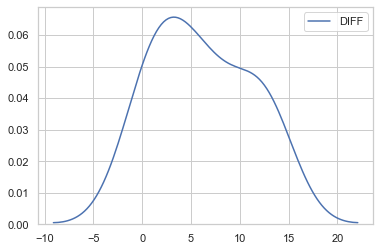

In [94]:
sns.kdeplot(final["DIFF"])

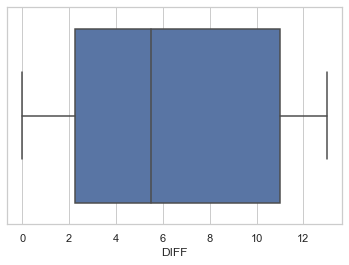

In [95]:
sns.boxplot(final["DIFF"])

Text(0.5, 1.0, 'Difference')

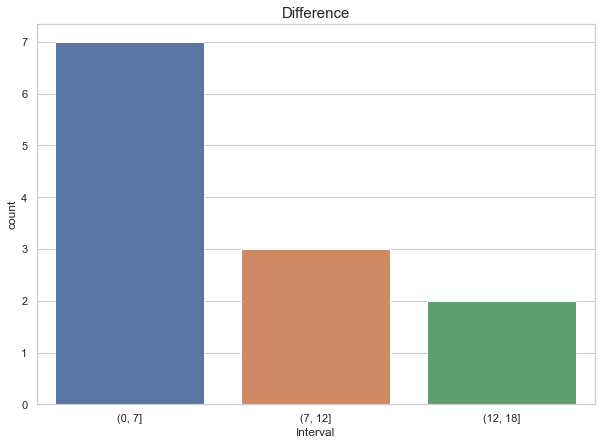

In [96]:
plt.figure(figsize=(10,7))
final["Interval"] = pd.cut(final["DIFF"],[0,7,12,18])
sns.countplot(final["Interval"])
plt.title("Difference",fontsize = 15)

From all the above analysis of both the team's ball taken we can predict that around 4-7 balls difference is expected to have between the balls both the team's will take to score 20 runs afiter scoring team 30 runs.

## Batsman to score more boundaires in the match

In [97]:
def boundary(player_name,opposition_team):
    
    player = matches[(matches["bowling_team"]==opposition_team)&(matches["batsman"]==player_name)]

    player_runs= player[player["wide_runs"]==0]
    
    #Batsman_Runs
    batsman_runs = player_runs.groupby(["match_id"]).agg({"batsman_runs":"sum","ball":"count"})
    
    batsman_runs.columns = ["batsman_runs","total balls"]
    
    #Boundary_runs
    player_boundaries = player_runs[(player_runs["batsman_runs"]==4)|(player_runs["batsman_runs"]==6)]

    boundary_runs = pd.DataFrame(player_boundaries.groupby(["match_id"]).agg({"batsman_runs":"sum"}))

    boundary_runs.columns = ["boundary runs"]
    
    #boundary_count
    player_boundaries = player_runs[(player_runs["batsman_runs"]==4)|(player_runs["batsman_runs"]==6)]

    boundary_count = pd.DataFrame(player_boundaries.groupby(["match_id"]).agg({"batsman_runs":"count"}))

    boundary_count.columns = ["Boundary count"]
    
    #merging the data
    final = pd.merge(batsman_runs,boundary_runs,on="match_id",how ="outer") 
    final = pd.merge(final,boundary_count,on="match_id",how ="outer")
    final["boundary runs"].fillna(0, inplace = True)
    final["batsman_runs"].fillna(0, inplace = True)
    final["Boundary count"].fillna(0, inplace = True)
    print(final)
    print(" ")
    
    print(final.describe().T)
    print(" ")
    
    #Data Visualization
    sns.set(style='whitegrid')
    plt.figure(figsize = (22,20))
    plt.subplot(3,2,1)
    sns.scatterplot(x="total balls",y="Boundary count",data= final)
    plt.title("Player balls faced VS boundary count ",fontsize = 20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlabel('Total Balls',fontsize=15)
    plt.ylabel('Boundary Count',fontsize=15)
    plt.subplot(3,2,2)
    sns.scatterplot(x="batsman_runs",y="Boundary count",data= final)
    plt.title("Player runs VS boundary count ",fontsize = 20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlabel('Batsman Runs',fontsize=15)
    plt.ylabel('Boundary Count',fontsize=15)
    
    
    plt.figure(figsize = (25,18))
    plt.subplot(3,3,1)
    sns.kdeplot(final["Boundary count"])
    plt.subplot(3,3,2)
    final["Ball Interval"] = pd.cut(final["total balls"],[0,10,20,30,40,50,60,120])
    sns.boxplot(x="Ball Interval", y="Boundary count", data = final)
    
    print("Average Boundary count :",round(np.mean(final["Boundary count"])))

- David Warner

          batsman_runs  total balls  boundary runs  Boundary count
match_id                                                          
21                   4            7            0.0             0.0
39                  30           21           22.0             5.0
469                 58           45           30.0             6.0
489                 12            9            4.0             1.0
531                 28           20           16.0             4.0
561                 17           15           10.0             2.0
618                 46           30           30.0             7.0
628                 73           56           38.0             9.0
11152               14           18            4.0             1.0
11321               51           47           18.0             4.0
 
                count  mean        std  min    25%   50%    75%   max
batsman_runs     10.0  33.3  22.730547  4.0  14.75  29.0  49.75  73.0
total balls      10.0  26.8  17.021555  7.0  15.75  20

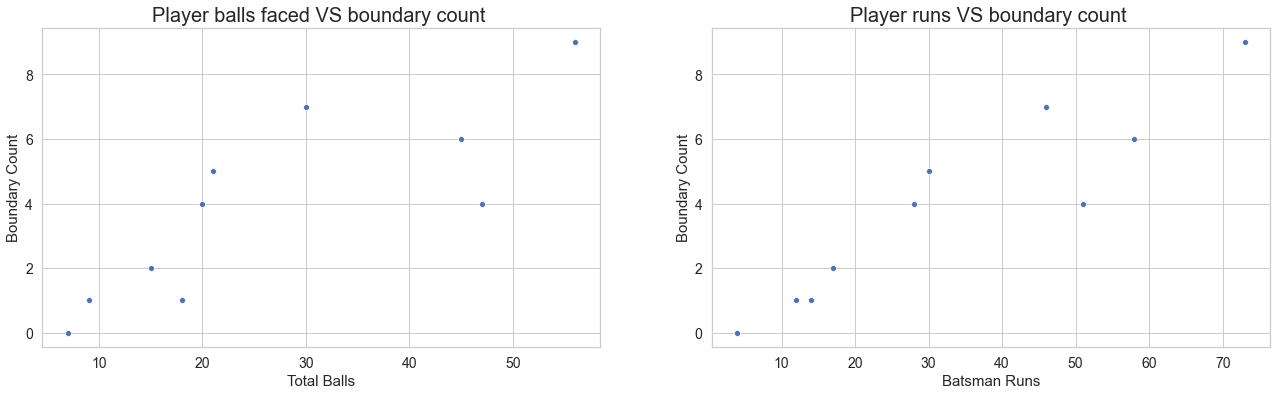

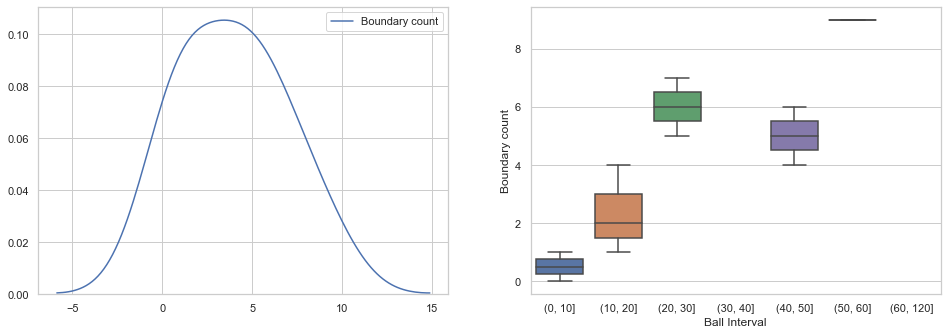

In [98]:
boundary("DA Warner","Delhi Capitals")

- Risabh Pant

          batsman_runs  total balls  boundary runs  Boundary count
match_id                                                          
21                   0            1            0.0             0.0
39                  34           20           22.0             5.0
618                 39           26           26.0             5.0
628                 32           26           12.0             3.0
7929                18           19            4.0             1.0
7935               129           63          102.0            22.0
11152                5            7            0.0             0.0
11321               24           19           12.0             3.0
11413               49           21           38.0             7.0
 
                count       mean        std  min   25%   50%   75%    max
batsman_runs      9.0  36.666667  38.026307  0.0  18.0  32.0  39.0  129.0
total balls       9.0  22.444444  17.321310  1.0  19.0  20.0  26.0   63.0
boundary runs     9.0  24.000000  31.87

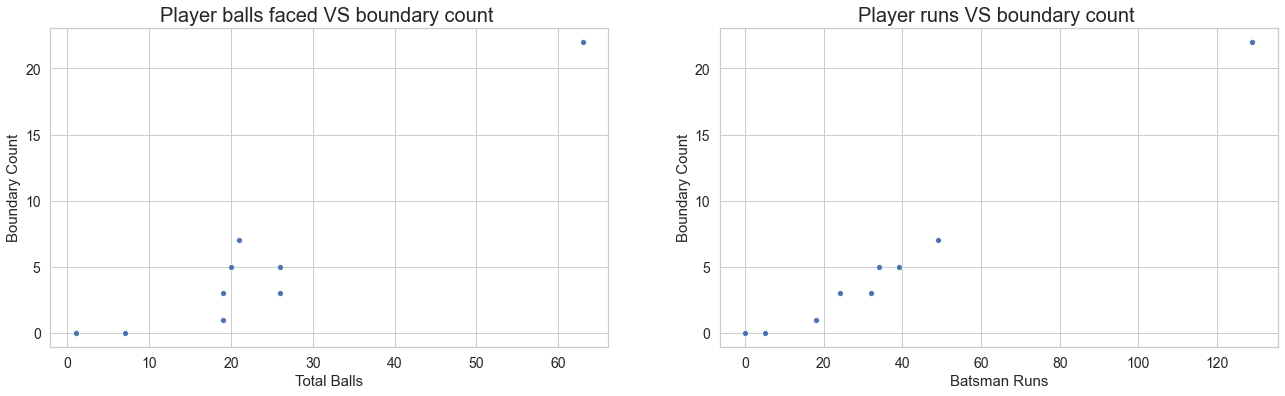

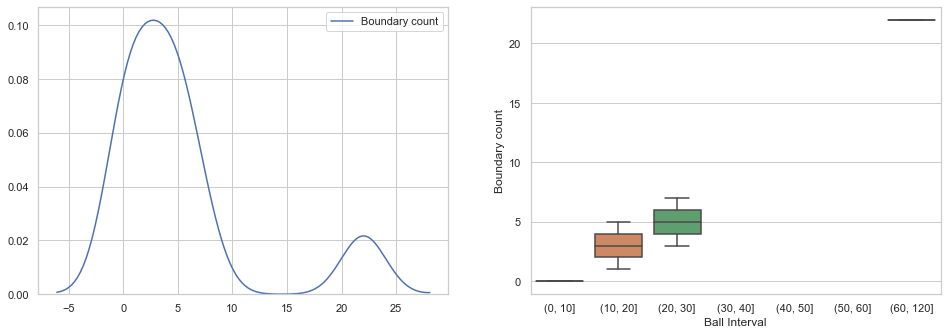

In [99]:
boundary("RR Pant","Sunrisers Hyderabad")

- Dhawan

          batsman_runs  total balls  boundary runs  Boundary count
match_id                                                          
11152               13           14              4               1
11321                7            8              4               1
11413               18           17             12               3
 
                count       mean       std  min   25%   50%   75%   max
batsman_runs      3.0  12.666667  5.507571  7.0  10.0  13.0  15.5  18.0
total balls       3.0  13.000000  4.582576  8.0  11.0  14.0  15.5  17.0
boundary runs     3.0   6.666667  4.618802  4.0   4.0   4.0   8.0  12.0
Boundary count    3.0   1.666667  1.154701  1.0   1.0   1.0   2.0   3.0
 
Average Boundary count : 2


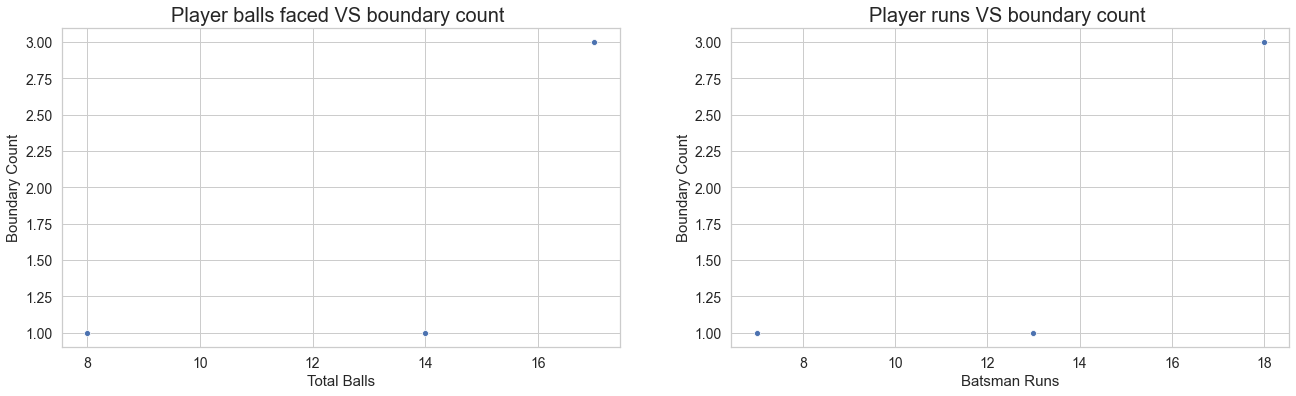

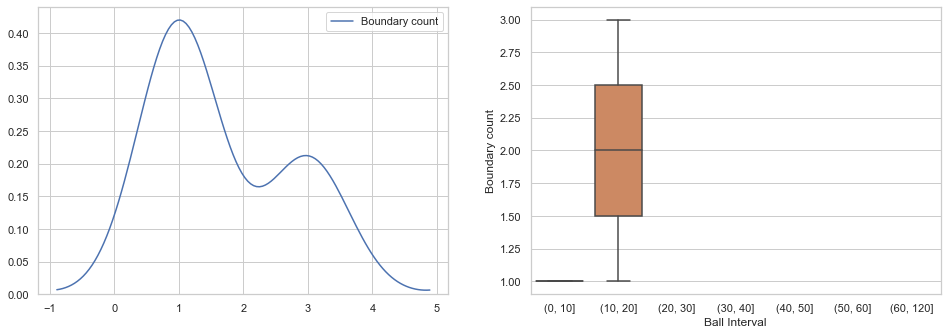

In [100]:
boundary("S Dhawan","Sunrisers Hyderabad")

- Manish Pandey

          batsman_runs  total balls  boundary runs  Boundary count
match_id                                                          
18                  69           49           34.0             7.0
31                   5            4            4.0             1.0
197                 39           29           22.0             5.0
339                 80           56           46.0            10.0
451                 10           14            6.0             1.0
463                 48           42           20.0             5.0
485                 23           14            8.0             2.0
535                  0            3            0.0             0.0
545                 22           19           10.0             2.0
578                 15           12           12.0             3.0
7929                21           17            8.0             2.0
11152               10           13            0.0             0.0
11413               31           36           12.0            

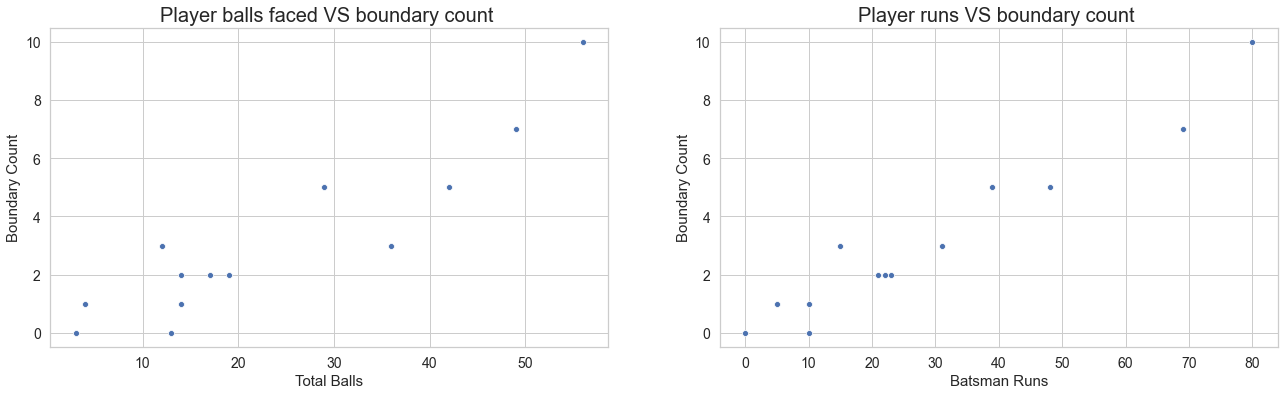

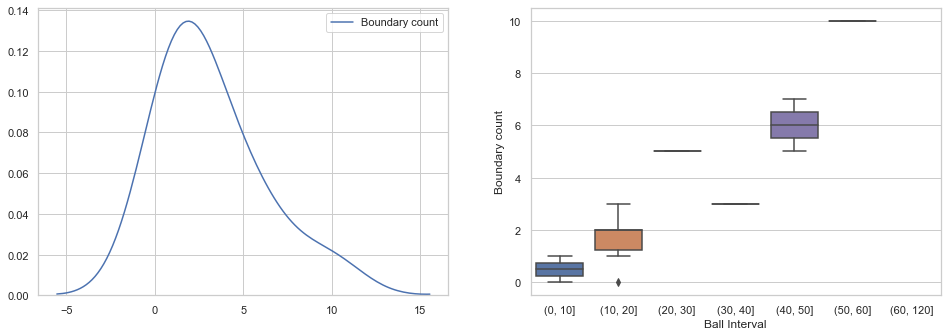

In [101]:
boundary("MK Pandey","Delhi Capitals")

- Williamson

          batsman_runs  total balls  boundary runs  Boundary count
match_id                                                          
21                  89           51           54.0            11.0
39                  24           24           10.0             2.0
618                 27           24           12.0             3.0
7929                32           30            6.0             1.0
7935                83           53           44.0            10.0
11321                3            8            0.0             0.0
11413               28           27            8.0             2.0
 
                count       mean        std  min   25%   50%   75%   max
batsman_runs      7.0  40.857143  32.266745  3.0  25.5  28.0  57.5  89.0
total balls       7.0  31.000000  15.958279  8.0  24.0  27.0  40.5  53.0
boundary runs     7.0  19.142857  20.939823  0.0   7.0  10.0  28.0  54.0
Boundary count    7.0   4.142857   4.450789  0.0   1.5   2.0   6.5  11.0
 
Average Boundary count : 4


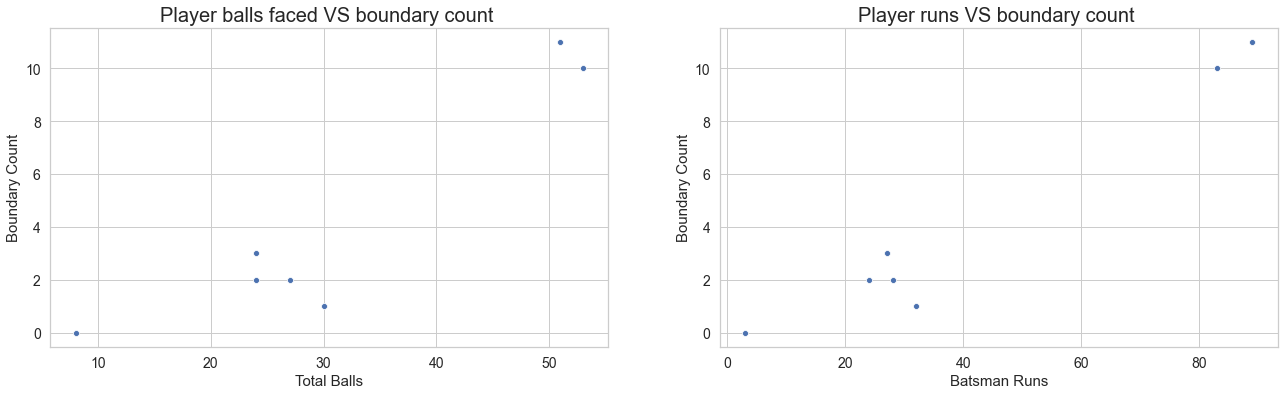

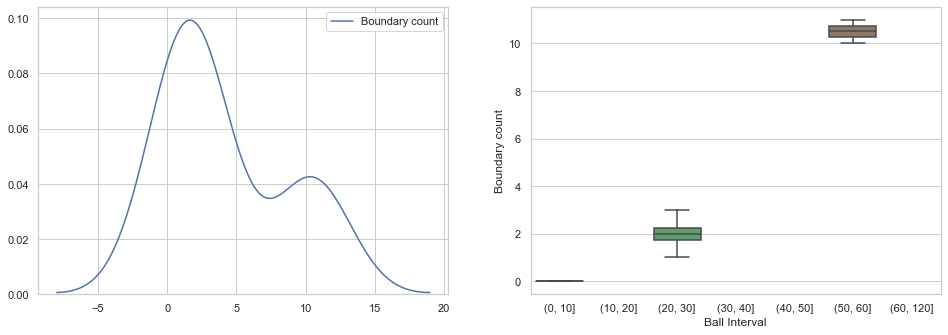

In [102]:
boundary("KS Williamson","Delhi Capitals")

- Iyer

          batsman_runs  total balls  boundary runs  Boundary count
match_id                                                          
21                  50           31           32.0             7.0
39                  33           25           16.0             3.0
531                 60           40           42.0             8.0
561                  0            7            0.0             0.0
7929                44           36           24.0             5.0
7935                 3            8            0.0             0.0
11152               43           41           18.0             4.0
11321               47           40           20.0             5.0
11413                8           10            4.0             1.0
 
                count       mean        std  min   25%   50%   75%   max
batsman_runs      9.0  32.000000  22.472205  0.0   8.0  43.0  47.0  60.0
total balls       9.0  26.444444  14.500958  7.0  10.0  31.0  40.0  41.0
boundary runs     9.0  17.333333  14.38749

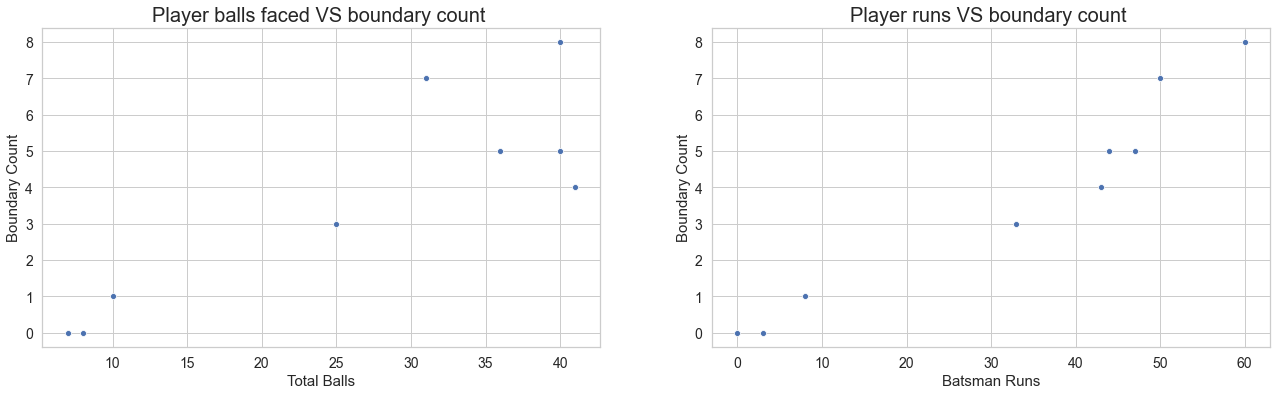

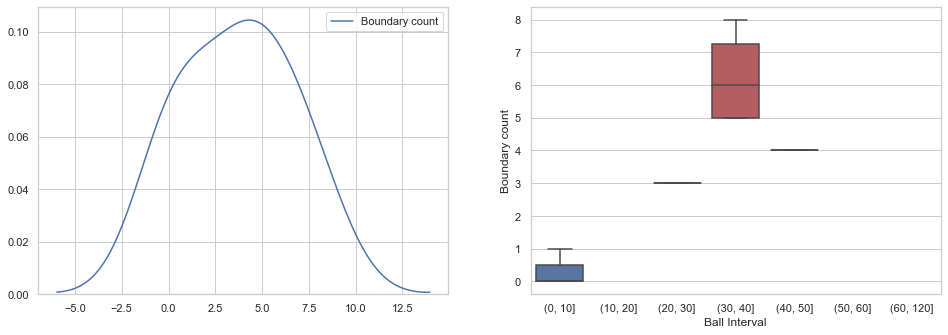

In [103]:
boundary("SS Iyer","Sunrisers Hyderabad")

- Saha

          batsman_runs  total balls  boundary runs  Boundary count
match_id                                                          
15                   7            5            4.0             1.0
95                   5            6            0.0             0.0
146                  1            1            0.0             0.0
154                  0            1            0.0             0.0
200                 20           17            8.0             2.0
502                 13           13            4.0             1.0
528                 39           28           18.0             3.0
548                  3            8            0.0             0.0
583                  3            7            0.0             0.0
612                 52           33           28.0             7.0
11413                8            9            4.0             1.0
 
                count       mean        std  min  25%  50%   75%   max
batsman_runs     11.0  13.727273  16.965205  0.0  3.0  7

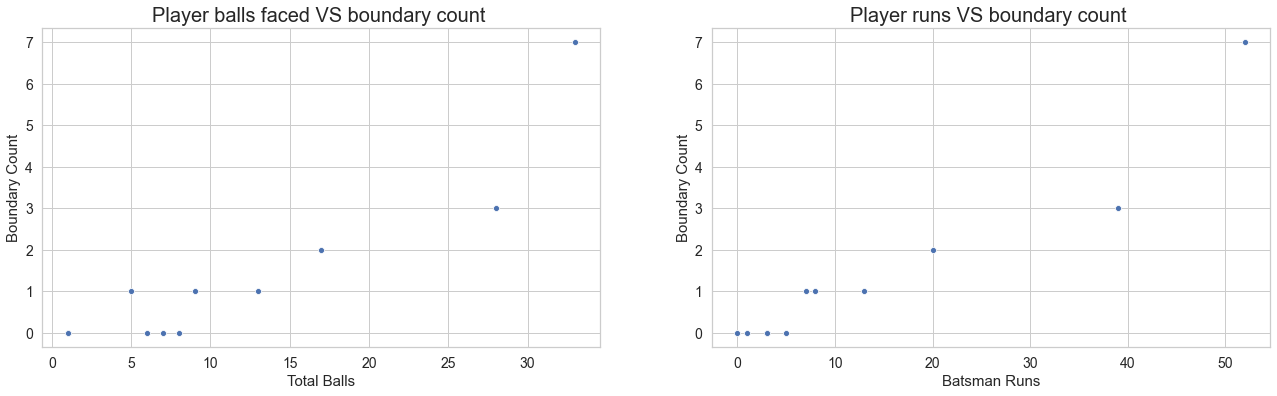

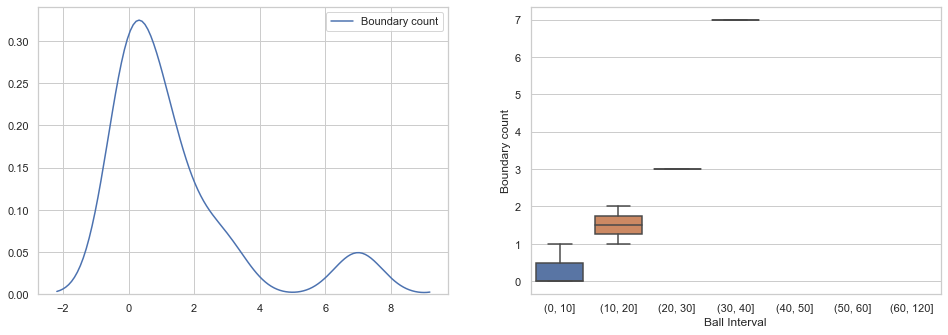

In [104]:
boundary("WP Saha","Delhi Capitals")

- Rahane

          batsman_runs  total balls  boundary runs  Boundary count
match_id                                                          
25                   2            7            0.0             0.0
43                  22           20            6.0             1.0
416                  1            9            0.0             0.0
449                 12           25            6.0             1.0
455                 18           20            6.0             1.0
461                 59           53           24.0             6.0
487                  0            3            0.0             0.0
529                 62           56           36.0             9.0
558                  8            6            8.0             2.0
598                  0            5            0.0             0.0
616                  0            3            0.0             0.0
7897                14           13            8.0             2.0
7921                66           53           26.0            

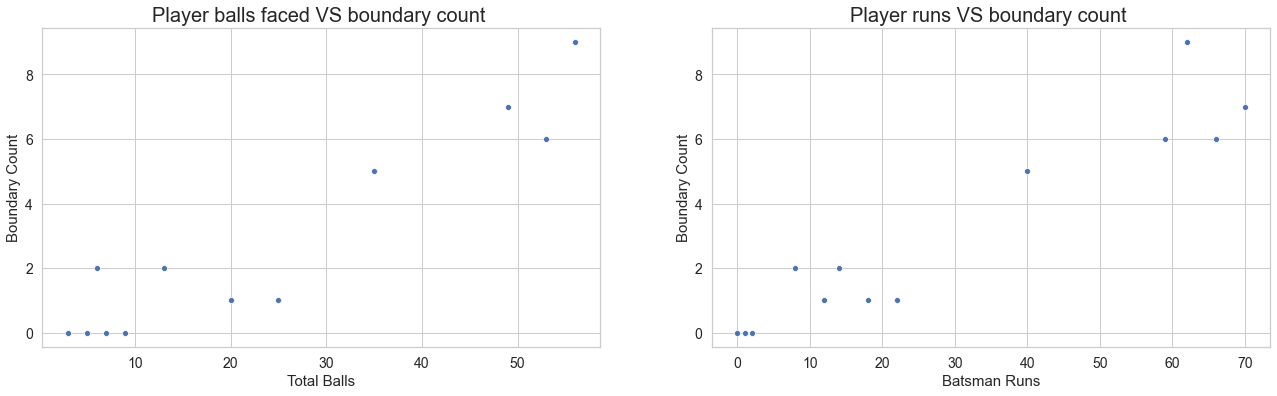

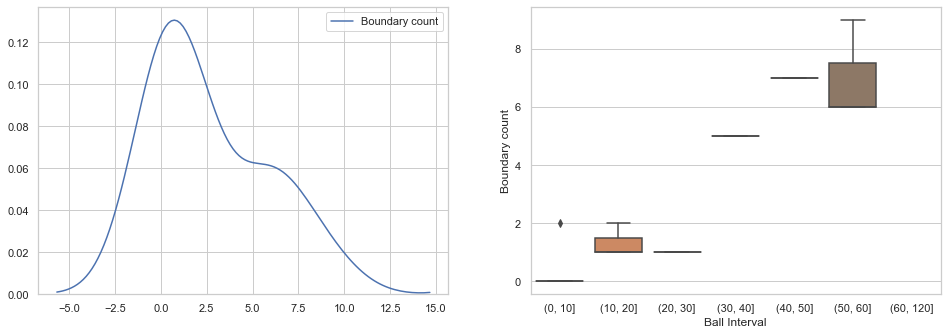

In [105]:
boundary("AM Rahane","Sunrisers Hyderabad")

- Hetmyer

          batsman_runs  total balls  boundary runs  Boundary count
match_id                                                          
11147                9            9              6               1
11345               75           47             52              10
 
                count  mean        std  min    25%   50%    75%   max
batsman_runs      2.0  42.0  46.669048  9.0  25.50  42.0  58.50  75.0
total balls       2.0  28.0  26.870058  9.0  18.50  28.0  37.50  47.0
boundary runs     2.0  29.0  32.526912  6.0  17.50  29.0  40.50  52.0
Boundary count    2.0   5.5   6.363961  1.0   3.25   5.5   7.75  10.0
 
Average Boundary count : 6


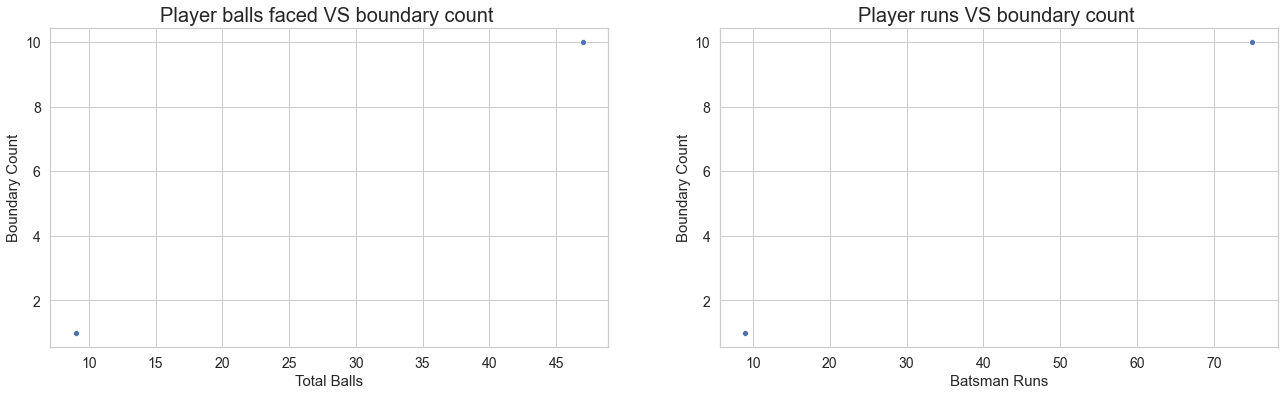

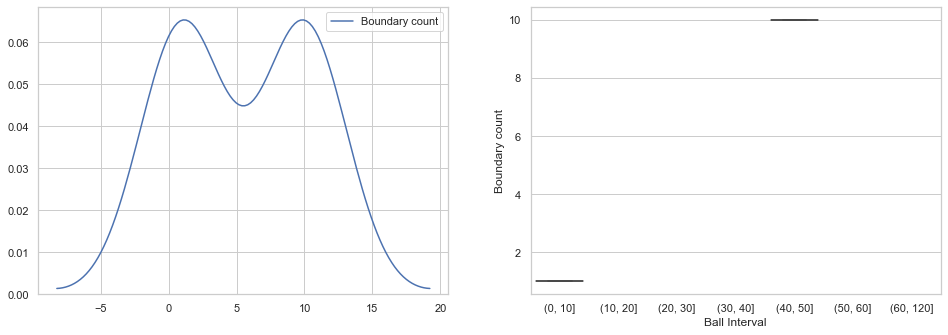

In [106]:
boundary("S Hetmyer","Sunrisers Hyderabad")

From all the above analysis of every player's contribution through boundaries in their total runs and balls , we can predict that Warner or R Pant is expected to score most boundaries

### Wickets 

- Against DC

In [107]:
rashid = matches[(matches["batting_team"] == "Delhi Capitals")&(matches["bowler"]=="Rashid Khan")]

In [108]:
rashid = rashid[rashid["dismissal_kind"]!="run out"]
rashid.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
4963,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,2,Delhi Capitals,...,0,0,0,0,0,4,0,4,NaN,NaN
4964,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,2,Delhi Capitals,...,0,0,0,0,0,0,0,0,NaN,NaN
4965,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,2,Delhi Capitals,...,0,0,0,0,0,0,0,0,NaN,NaN
4966,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,2,Delhi Capitals,...,0,0,1,0,0,0,1,1,NaN,NaN
4967,21,2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,0,Sunrisers Hyderabad,2,Delhi Capitals,...,0,0,0,0,0,0,0,0,NaN,NaN


In [109]:
rashid_wickets = pd.DataFrame(rashid.groupby(["match_id"])["dismissal_kind"].count())

rashid_wickets.columns = ["wickets"]

rashid_wickets

,wickets
match_id,
21,0
39,0
7929,2
7935,0
11152,1
11321,1
11413,2


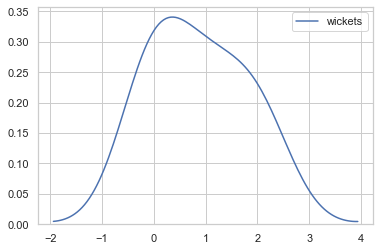

In [110]:
sns.kdeplot(rashid_wickets["wickets"])

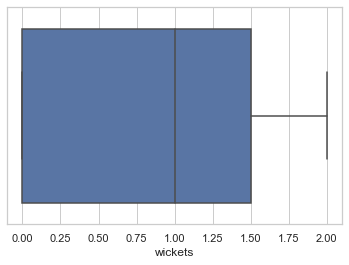

In [111]:
sns.boxplot(rashid_wickets["wickets"])

In [112]:
rashid_wickets.describe().T

,count,mean,std,min,25%,50%,75%,max
wickets,7.0,0.857143,0.899735,0.0,0.0,1.0,1.5,2.0


- Recent Year Overall Performance 

In [113]:
rashid = matches[(matches["bowler"]=="Rashid Khan")]
rashid = rashid[(rashid["season"]==2018)|(rashid["season"]==2019)]

In [114]:
rashid = rashid[rashid["dismissal_kind"]!="run out"]
rashid.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
151233,7897,2018,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,0,Sunrisers Hyderabad,1,Rajasthan Royals,...,0,0,0,0,0,0,0,0,NaN,NaN
151234,7897,2018,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,0,Sunrisers Hyderabad,1,Rajasthan Royals,...,0,0,0,0,0,0,0,0,NaN,NaN
151235,7897,2018,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,0,Sunrisers Hyderabad,1,Rajasthan Royals,...,0,0,0,0,0,0,0,0,NaN,NaN
151236,7897,2018,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,0,Sunrisers Hyderabad,1,Rajasthan Royals,...,0,0,0,0,0,1,0,1,NaN,NaN
151237,7897,2018,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,0,Sunrisers Hyderabad,1,Rajasthan Royals,...,0,0,0,0,0,0,0,0,NaN,NaN


In [115]:
rashid_wickets = pd.DataFrame(rashid.groupby(["match_id"])["dismissal_kind"].count())

rashid_wickets.columns = ["wickets"]

rashid_wickets

,wickets
match_id,
7897,1
7900,1
7903,0
7909,1
7913,1
7916,2
7918,3
7921,1
7929,2


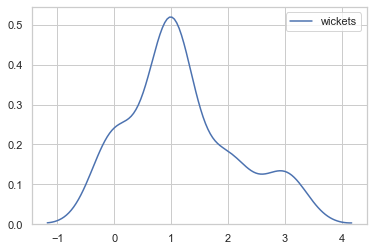

In [116]:
sns.kdeplot(rashid_wickets["wickets"])

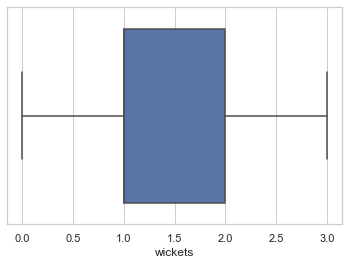

In [117]:
sns.boxplot(rashid_wickets["wickets"])

Text(0.5, 1.0, 'Wickets')

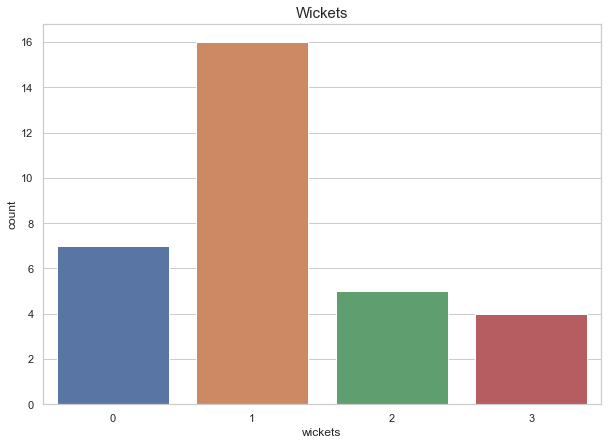

In [118]:
plt.figure(figsize=(10,7))
sns.countplot(rashid_wickets["wickets"])
plt.title("Wickets",fontsize = 15)

So,form all the above analysis of wickets taken by Rashid Khan against DC and overall also in recent years we can predict that Rashid Khan is expected to take 0-1 wicket in this match also. 